In [1]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are using python 3.10 or 3.11 for compatibility of the required packages
!pip install qiskit[visualization]==1.0.2
!pip install qiskit-aer
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Density Matrix for a Pure State**


A pure quantum state is described by a state vector ∣𝜓⟩ in a Hilbert space. 
The density matrix for a pure state is constructed as follows:

**Step-by-Step Calculation**

**State Vector:**
A pure state is represented by a normalized state vector ∣𝜓⟩

For example, consider a qubit state:

       ∣𝜓⟩ = 𝛼 ∣0⟩ + 𝛽∣1⟩

where 𝛼 and 𝛽 are complex numbers such that ∣𝛼∣2+∣𝛽∣2=1

**Outer Product:**
The density matrix 𝜌 for the pure state ∣𝜓⟩ is given by the outer product of the state vector with itself:

        𝜌 = ∣𝜓⟩⟨𝜓∣

Matrix Form: Using the state vector ∣𝜓⟩=𝛼∣0⟩+𝛽∣1⟩, we can write the density matrix explicitly:

        𝜌 =(𝛼∣0⟩+𝛽∣1⟩)(𝛼∗⟨0∣+𝛽∗⟨1∣)
        
Expanding this product, we get:

       𝜌 =∣𝛼∣2∣0⟩⟨0∣+𝛼𝛽∗∣0⟩⟨1∣+𝛼∗𝛽∣1⟩⟨0∣+∣𝛽∣2∣1⟩⟨1∣


Quantum Circuit for Pure State:


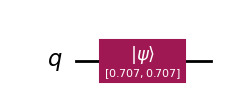

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

# Pure state example
# Define the state |ψ⟩ = α|0⟩ + β|1⟩
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)

# Create a quantum circuit to prepare this state
qc_pure = QuantumCircuit(1)
qc_pure.initialize([alpha, beta], 0)
print("Quantum Circuit for Pure State:")

#Let's draw
qc_pure.draw('mpl')


In [12]:
# Get the density matrix for the pure state
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import array_to_latex


    
density_matrix_pure =DensityMatrix(qc_pure)
print("\nDensity Matrix for Pure State:")
array_to_latex(density_matrix_pure, prefix="\\rho = ")


Density Matrix for Pure State:


<IPython.core.display.Latex object>

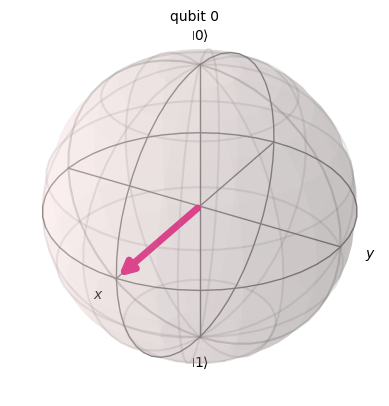

In [14]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(qc_pure)

**Density Matrix for a Mixed State**


A mixed state represents a statistical ensemble of pure states. It is described by a set of states 
${∣𝜓_𝑖⟩}$ and their corresponding probabilities ${𝑝_𝑖}$.

**Step-by-Step Calculation**

**Ensemble of States:**

Suppose we have a system that can be in states $∣𝜓_𝑖⟩$ with probabilities $𝑝_𝑖$.

Each $∣𝜓_𝑖⟩$ is a pure state.

**Density Matrix for Each Pure State:**

For each pure state $∣𝜓_𝑖⟩$, we can write the density matrix $𝜌_𝑖$ as:

   $$𝜌_𝑖 = ∣𝜓_𝑖⟩⟨𝜓_𝑖∣$$

**Weighted Sum:**

The density matrix $𝜌$ for the mixed state is the weighted sum of the density matrices of the pure states, weighted by their probabilities 
$𝑝_𝑖$ :

$$ \rho = \sum_i p_i \rho_i = \sum_i p_i |\psi_i\rangle \langle \psi_i| $$

where $\sum_i p_i = 1$
                           
**Example Calculation**

Consider a simple example with two pure states $|\psi_1\rangle$ and $|\psi_2\rangle$ with probabilities $p_1$ and $p_2$ respectively.

State Vectors:

$|\psi_1\rangle = \alpha_1 |0\rangle + \beta_1 |1\rangle$

$|\psi_2\rangle = \alpha_2 |0\rangle + \beta_2 |1\rangle$


**Density Matrices for Pure States**

$$\rho_1 = |\psi_1\rangle \langle \psi_1| = \begin{pmatrix}
|\alpha_1|^2 & \alpha_1 \beta_1^* \\
\alpha_1^* \beta_1 & |\beta_1|^2
\end{pmatrix}
$$


$$\rho_2 = |\psi_2\rangle \langle \psi_2| = \begin{pmatrix}
|\alpha_2|^2 & \alpha_2 \beta_2^* \\
\alpha_2^* \beta_2 & |\beta_2|^2
\end{pmatrix}
$$

**Density Matrices for Mixed States**

 $$\rho= \rho_1 p_1 + \rho_2 p_2$$
 
$$\rho = p_1 \begin{pmatrix}
|\alpha_1|^2 & \alpha_1 \beta_1^* \\
\alpha_1^* \beta_1 & |\beta_1|^2
\end{pmatrix} +
p_2 \begin{pmatrix}
|\alpha_2|^2 & \alpha_2 \beta_2^* \\
\alpha_2^* \beta_2 & |\beta_2|^2
\end{pmatrix}
$$

In [18]:
# Create two pure states
qc1 = QuantumCircuit(1)
qc1.x(0)  # |1⟩ state

qc2 = QuantumCircuit(1)
qc2.h(0)  # |+⟩ state

# Convert circuits to statevectors
psi1 = Statevector.from_instruction(qc1)
psi2 = Statevector.from_instruction(qc2)

# Create density matrices for each pure state
rho1 = DensityMatrix(psi1)
rho2 = DensityMatrix(psi2)

# Mix the states with probabilities 0.7 and 0.3
p1, p2 = 0.7, 0.3
mixed_state = p1 * rho1.data + p2 * rho2.data

# Create a DensityMatrix object from the mixed state
mixed_density_matrix = DensityMatrix(mixed_state)

# Print the mixed state density matrix in LaTeX format
print("Mixed State Density Matrix in LaTeX format:")
array_to_latex(mixed_density_matrix, prefix="\\rho_{mixed} = ")



Mixed State Density Matrix in LaTeX format:


<IPython.core.display.Latex object>

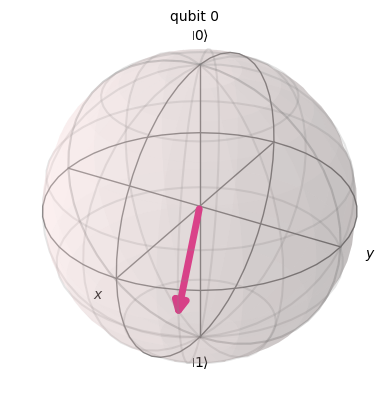

In [20]:
plot_bloch_multivector(mixed_state)

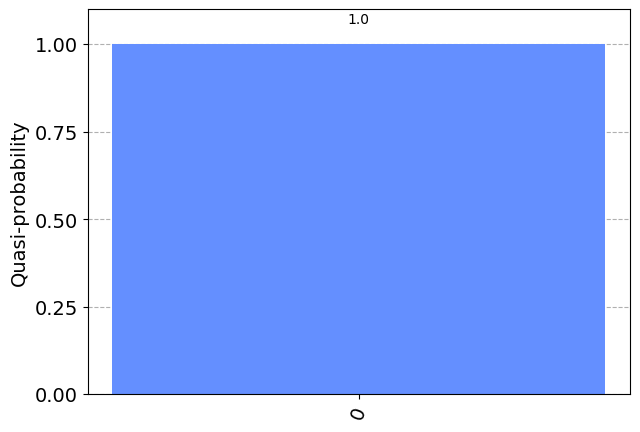

In [15]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

#Measure
circuit.measure(qreg,creg)

results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

**Rotational gates**

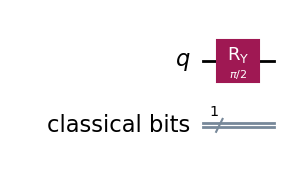

In [19]:
# Create quantum and classical registers with 3 qubits
import numpy as np
from math import pi

qreg = QuantumRegister(1,"q")
creg = ClassicalRegister(1,"classical bits")

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply required gates
circuit.ry(pi/2,0)
#circuit.h(1)
#circuit.h(2)

#Let's draw
circuit.draw('mpl')

In [20]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import StatevectorSimulator
from qiskit.quantum_info import Statevector

job = StatevectorSimulator().run(circuit)
state = job.result().get_statevector(decimals=3)
print(state) 
Statevector(state).draw('latex')

Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

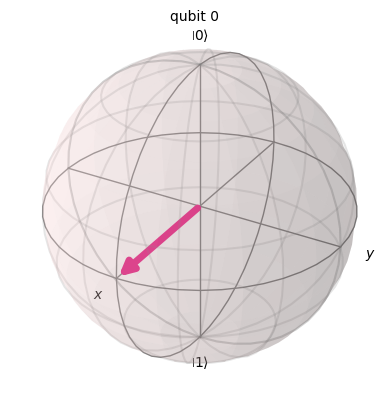

In [21]:
plot_bloch_multivector(state)

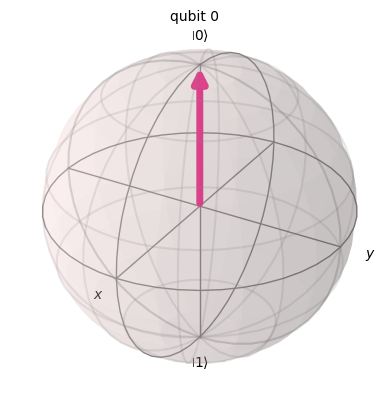

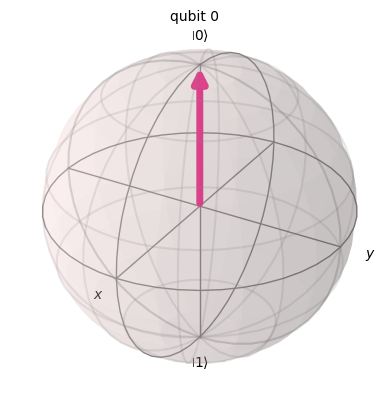

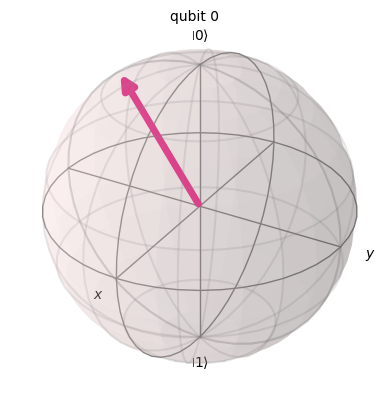

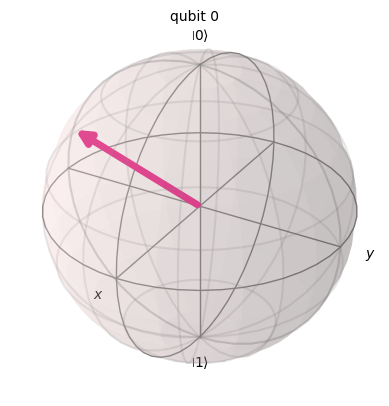

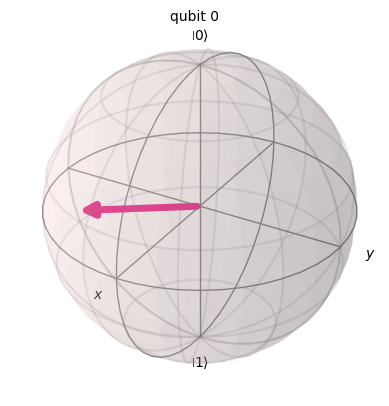

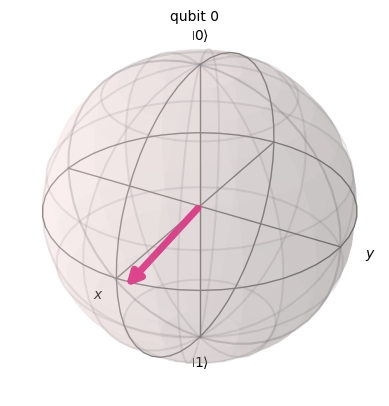

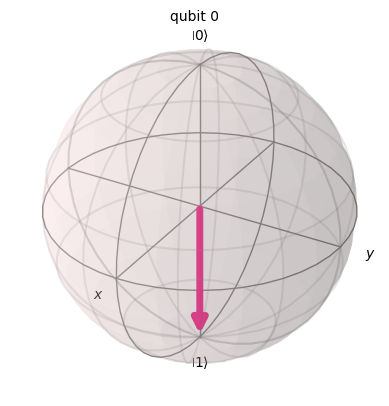

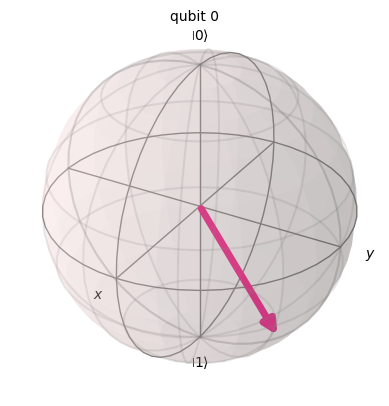

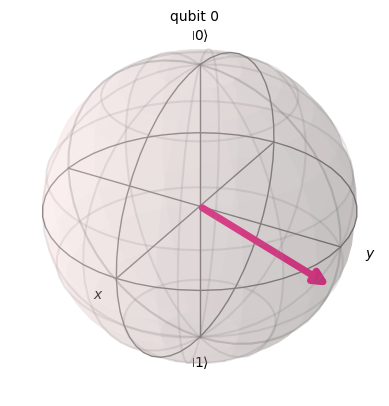

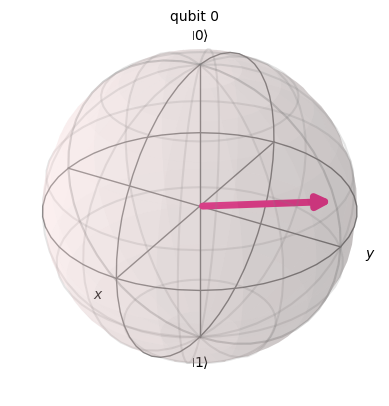

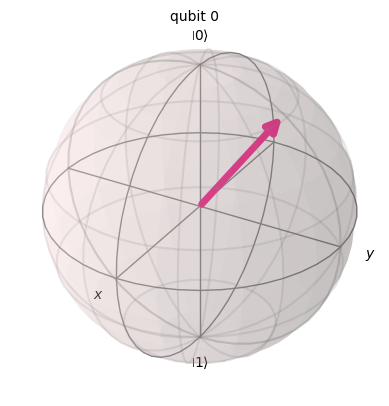

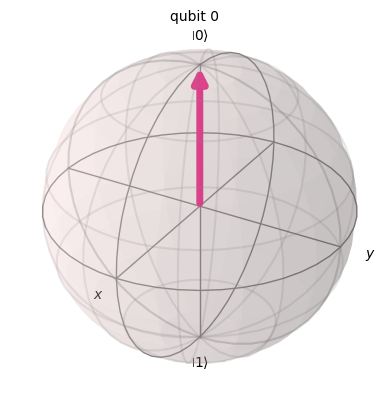

In [22]:
from IPython.display import clear_output
%matplotlib inline
import time
import pylab as pl
from IPython import display

def display_rotation(angle):
    # Apply required gates
    qreg = QuantumRegister(1,"q")
    creg = ClassicalRegister(1,"classical bits")

    # Create a new circuit
    circuit = QuantumCircuit(qreg,creg)

    circuit.rx(angle,0)
    #Let's draw
    #circuit.draw('mpl')
    job = StatevectorSimulator().run(circuit)
    state = job.result().get_statevector(decimals=3)
    #print(state) 
    Statevector(state).draw('latex')
    #clear_output(wait=True)
    return state

interval = np.linspace(0, 2 * np.pi, 11)

for i in interval:
    #display.clear_output(wait=True)
    state=display_rotation(i)
    plot_bloch_multivector(state)
    time.sleep(0.5)
    display.clear_output(wait=True)
    display.display(pl.gcf())


#for angle in range(0,10):
    
    

**Superposition**

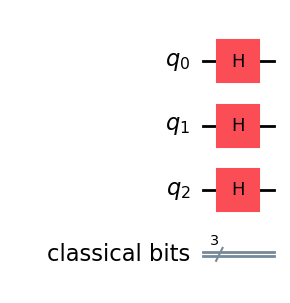

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Create quantum and classical registers with 3 qubits
qreg = QuantumRegister(3,"q")
creg = ClassicalRegister(3,"classical bits")

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to all qubits
circuit.h(0)
circuit.h(1)
circuit.h(2)

#Let's draw
circuit.draw('mpl')


In [3]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import StatevectorSimulator
from qiskit.quantum_info import Statevector

job = StatevectorSimulator().run(circuit)
state = job.result().get_statevector(decimals=3)
print(state) 
Statevector(state).draw('latex')

Statevector([0.354+0.j, 0.354+0.j, 0.354+0.j, 0.354+0.j, 0.354+0.j,
             0.354+0.j, 0.354+0.j, 0.354+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

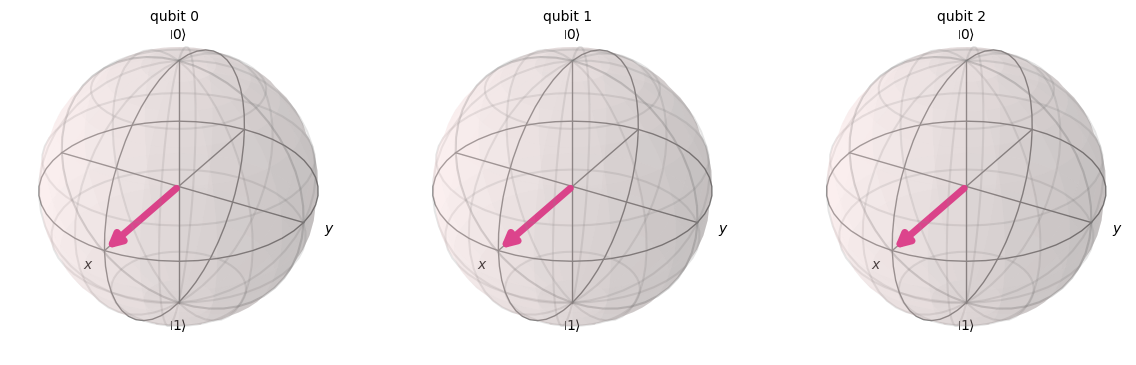

In [4]:
plot_bloch_multivector(state)

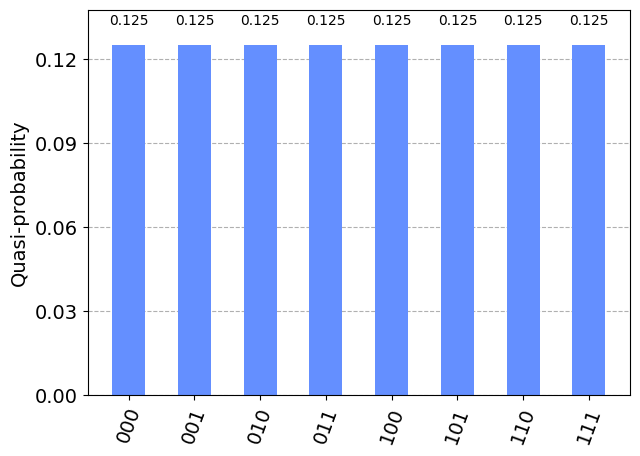

In [5]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

#Measure
circuit.measure(qreg,creg)
results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

**Entanglement**

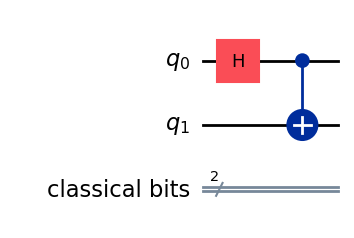

In [6]:
# Create quantum and classical registers with 3 qubits
qreg = QuantumRegister(2,"q")
creg = ClassicalRegister(2,"classical bits")

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to all qubits
circuit.h(0)
circuit.cx(0,1)

#Let's draw
circuit.draw('mpl')

In [7]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

job = StatevectorSimulator().run(circuit)
state = job.result().get_statevector(decimals=3)
print(state) 
Statevector(state).draw('latex')

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

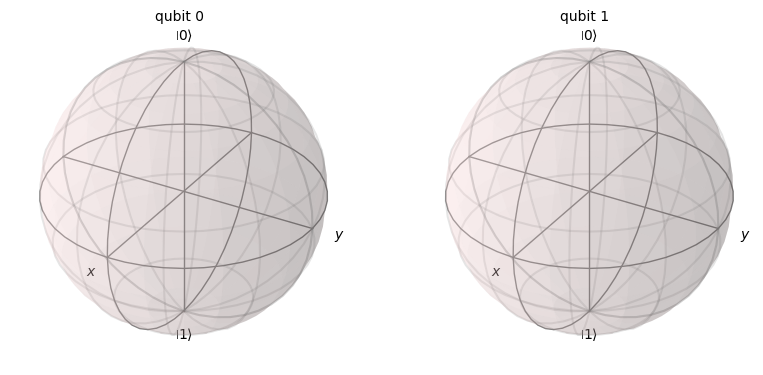

In [8]:
plot_bloch_multivector(state)

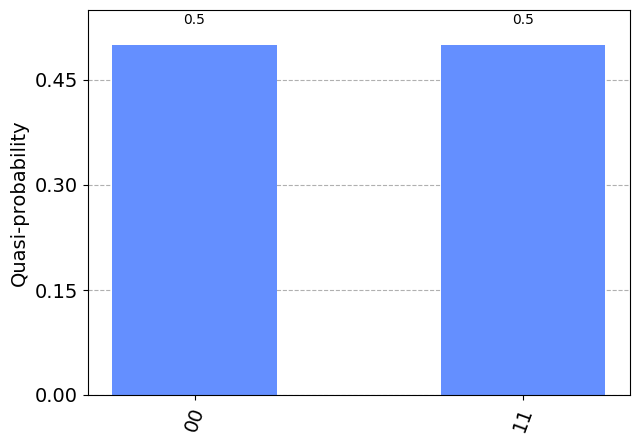

In [9]:
#Measure
circuit.measure(qreg,creg)

results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

**GHZ State**

*Daniel Greenberger, Michael Horne, and Anton Zeilinger, who first studied some of its properties*

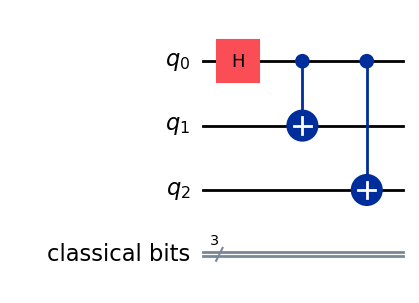

In [10]:
# Create quantum and classical registers with 3 qubits
qreg = QuantumRegister(3,"q")
creg = ClassicalRegister(3,"classical bits")

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply required gates
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)

#Let's Draw

circuit.draw('mpl')

In [11]:
job = StatevectorSimulator().run(circuit)
state = job.result().get_statevector(decimals=3)
print(state) 
Statevector(state).draw('latex')

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

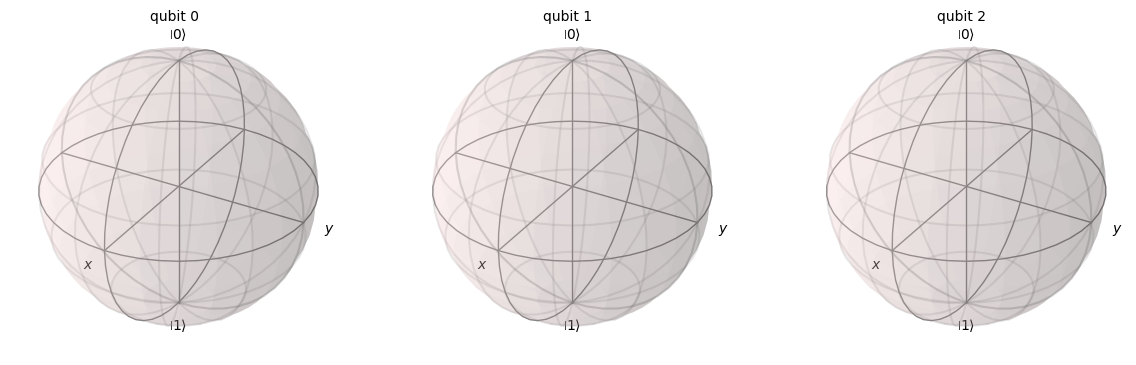

In [12]:
plot_bloch_multivector(state)

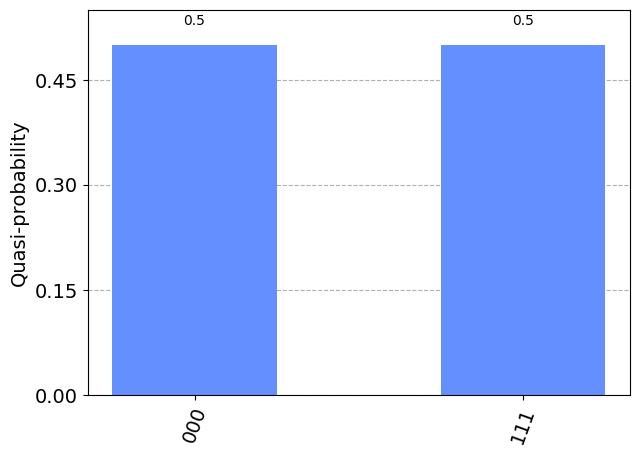

In [13]:
#Measure
circuit.measure(qreg,creg)

results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

In [19]:
def deutsch_jozsa_algorithm(f, n):
    # Create a quantum circuit with n+1 qubits (n for input, 1 ancillary) and n classical bits
    circuit = QuantumCircuit(n+1, n)
    
    # Apply Hadamard gate to all qubits (superposition)
    circuit.h(range(n+1))
    
    # Apply X gate to the ancillary qubit and Hadamard gate again
    circuit.x(n)
    circuit.h(n)

    # Apply the function f to each input qubit and perform Controlled-X (CX) gates accordingly
    for qubit in range(n):
        if f(qubit):
            circuit.cx(qubit, n)

    # Apply Hadamard gate again to the input qubits
    circuit.h(range(n))

    # Measure the input qubits and store the results in the corresponding classical bits
    circuit.measure(range(n), range(n))

    return circuit

In [26]:
# Define a constant function that always returns 0
def constant_zero(x):
    return 0

# Define a balanced function that returns 1 for all inputs
def balanced_identity(x):
    return 1

# Choose the function to be used in the Deutsch-Jozsa algorithm (balanced in this case)
f = balanced_identity

# Set the number of input qubits
n = 2

# Generate the Deutsch-Jozsa quantum circuit using the chosen function and input size
circuit = deutsch_jozsa_algorithm(f, n)


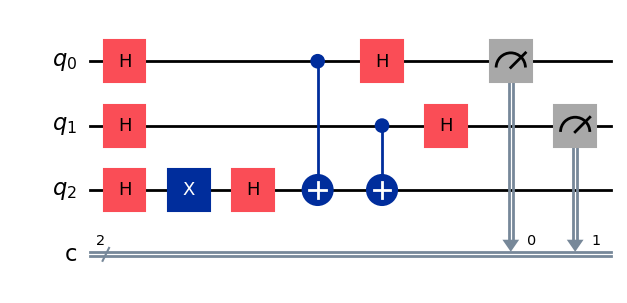

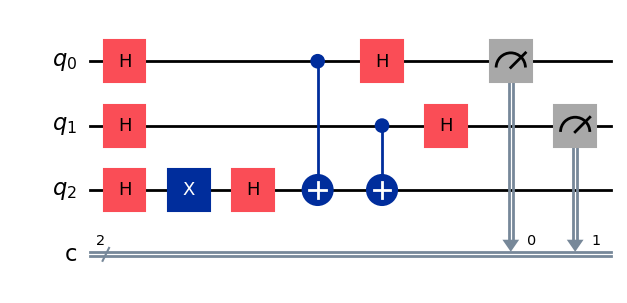

In [27]:
circuit.draw('mpl')